# An optimization using Genetic algorithm for Rastrigin function

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Defining functions

### Rastrigin function

In [2]:
def rastrigin_function(x,y):
    '''
    Calculate the rosenbrock map.   
    
    '''
    p1 = x
    p2 = y
    z = 20. + p1**2 + p2**2 - 10.*np.cos(2.*np.pi*p1) - 10.*np.cos(2.*np.pi*p2)
    return z

In [3]:
def rastrigin(p):
    '''
    Calculate the rosenbrock function.   
    
    '''
    p1 = p[0]
    p2 = p[1]
    z = 20. + p1**2 + p2**2 - 10.*np.cos(2.*np.pi*p1) - 10.*np.cos(2.*np.pi*p2)
    return z

## Parameters for calculating the rastrigin function 

In [4]:
Nx = 50
Ny = 50

In [5]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-5.,5.,num=Ny)
X,Y = np.meshgrid(x,y)

In [6]:
Z = rastrigin_function(X,Y) 

In [7]:
Z_ras = histeq(Z).reshape(Nx,Ny)

## Visuatization of the Rastrigin function 


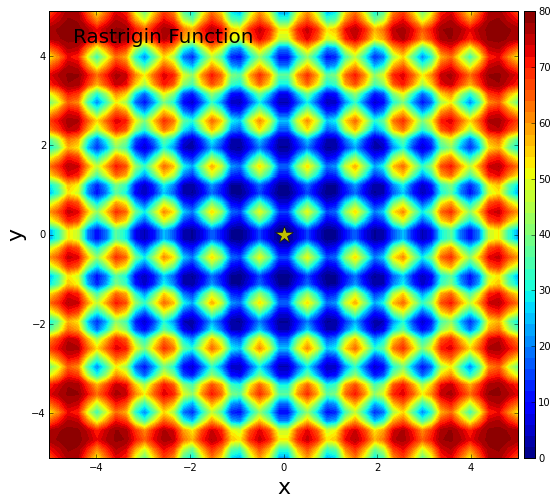

In [8]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ras, 50)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.plot(0., 0., '*y',markersize=18)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rastrigin Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


## Calculating the Genetic Algorithm for Rastrigin function

### Functions for Genetic Algorithm

In [9]:
def function(n,p):
    '''
    Calcula o valor da funcao para uma determinada populacao.
    '''
    phi = np.zeros(n)

    for j, pop in enumerate(p):
        phi[j] = rastrigin(pop)
    
    return phi

In [10]:
def fitness(phi):
    '''
    Calcula a aptidao de cada um dos n individuos que compoem uma populacao.
    
    input 
    
    f : array - funcao calculada para cada um dos individuos.
    
    return
    
    s : array - aptidao calculada para cada um dos individuos.
    '''
    
    s = 1./(1. + abs(phi))
    s /= np.sum(s)
    
    return s

In [11]:
def crossover(n, g, p, s):
    '''
    Funcao que faz o cruzamento entre individuos da populacao
    
    input
    
    n: integer - numero de individuos que compoem a populacao
    g: integer - numero de genes 
    p: array - array com os individos que compoem a populacao
    s: array - array que contem a aptidao de cada um dos individuos
    
    return
    
    pf: array - array que contem os filhos
    
    '''
    i_p = []
    i_m = []
    for i in range(n):
        ip, im = np.random.choice(np.arange(n), size=g, replace=False, p=s)
        i_p.append(ip)
        i_m.append(im)
       
    pf = np.empty((n,g),dtype=float)
    pf[:, 0] = (p[i_p, 0]*s[i_p] + p[i_m, 0]*s[i_m])/(s[i_p] + s[i_m])
    pf[:, 1] = (p[i_p, 1]*s[i_p] + p[i_m, 1]*s[i_m])/(s[i_p] + s[i_m])    
    
    return pf

In [12]:
def mutation(n,g,p):
    '''
    Funcao que faz a mutacao de algum gene em algum individuo da populacao
    
    input
    
    n: integer - numero de individuos que compoem a populacao
    g: integer - numero de genes 
    p: array - array com os individos que compoem a populacao
        
    return
    
    pf: array - array que contem os filhos
    
    '''
    prob = 0.1
    for i in range(n):
        rand = np.random.rand()
        if rand <= prob:
            j_mutation = np.random.choice(np.arange(g))
            p[i,j_mutation] += (np.random.uniform(low=-2.0, high=2.0, size=None))
    return p

In [13]:
def elitism(n,nr,g, p_pai, p_filho):
    '''
    Seleciona os melhores individuos entre uma população de pais e filhos.
    
    input
    
    n: integer - numero total de individuos.
    nr: integer - numero de filhos que serao replicados
    p_pai: array - populacao de pais
    p_filho: array - populacao de filhos
    
    return
    
    p_new : array - população nova
    '''
    p_tot = np.vstack((p_pai, p_filho))
    
    phi_tot = function(n,p_tot)
    i_sort = np.argsort(phi_tot)
    
    i_best = i_sort[:nr]
    
    p_best = np.empty((nr,g))
    for i in range(nr):
        p_best[i] = p_tot[i_best[i]]
    
    p_red = np.delete(p_tot,p_bad).reshape(n-nr,g)
    p_new = np.vstack((p_best,p_red))        
    return p_new

### Initial parameters for the algorithm

In [14]:
itmax = 150

In [15]:
g = 2
n = 40
nr = 2

for i in range(n):
        p0 = 10.*np.random.rand(n,2) - 5.

In [16]:
phi0 = function(n,p0) # function phi for rastrigin

In [17]:
s0 = fitness(phi0) # function for aptidao

In [18]:
i_best = np.argmax(s0)

In [19]:
# List for phi and p0

px = [p0[i_best,0]]
py = [p0[i_best,1]]
phi_it = [phi0[i_best]]

### GA Algorithm

In [20]:
for i in range(itmax):
    p_new = crossover(n,g,p0,s0)
    p = mutation(n,g,p_new)
    #p = elitism(n,nr,g,p0,p)
    phi = function(n,p)
    s = fitness(phi)
    i_best = np.argmax(s)
    
    phi0 = phi
    p0 = p
    s0 = s
     
    px.append(p0[i_best,0])
    py.append(p0[i_best,1])
    phi_it.append(phi0[i_best])   

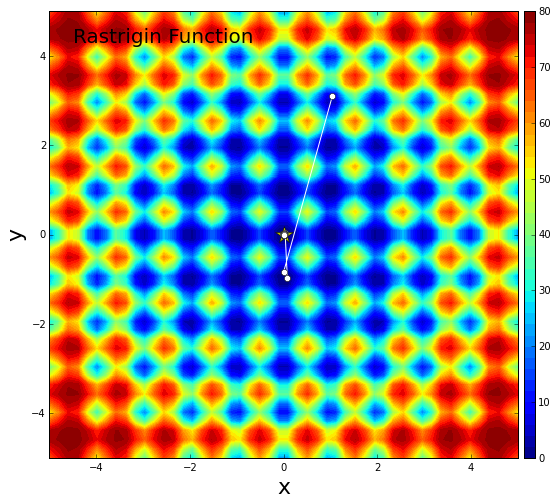

In [21]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ras, 50)
plt.plot(0., 0., '*y',markersize=18)
plt.plot(px,py,'wo-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rastrigin Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

In [22]:
print p0[i_best]

[ 0.00037202 -0.00385653]


## Analysis of convergence

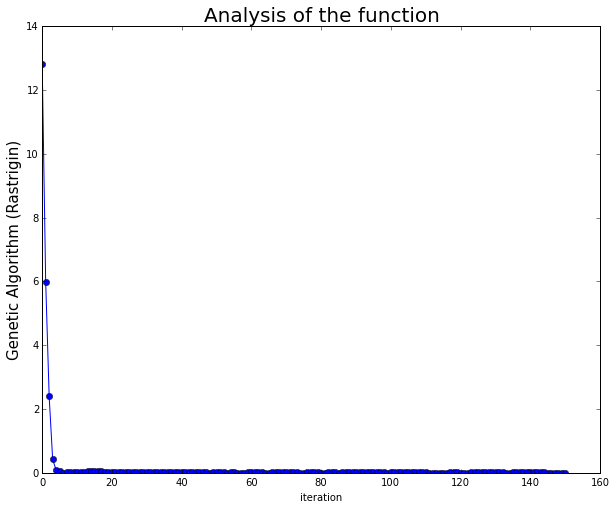

In [23]:
plt.figure(figsize=(10,8))

plt.plot(phi_it, 'o-')
plt.title('Analysis of the function',fontsize=20)
plt.ylabel('Genetic Algorithm (Rastrigin)',fontsize=15)
plt.xlabel('iteration',)

plt.show()
